In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
# from tenser flow import cifar10
from tensorflow.keras.datasets import cifar10


In [13]:
# load the data from cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [14]:
print ("shape of x_train",x_train.shape)
print ("shape of y_train",y_train.shape)
print ("shape of x_test",x_test.shape)
print ("shape of y_test",y_test.shape)

shape of x_train (50000, 32, 32, 3)
shape of y_train (50000, 1)
shape of x_test (10000, 32, 32, 3)
shape of y_test (10000, 1)


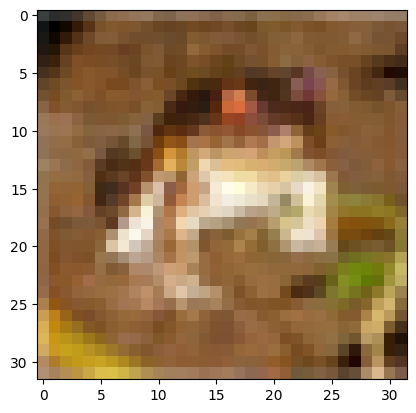

In [15]:
plt.imshow(x_train[0], cmap='gray')

In [16]:
x_test_n = x_test / 255
x_train_n = x_train / 255
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
# show the paramiters
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 381,770 (1.46 MB)

 Trainable params: 381,770 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# prompt: make a call back function

callback = tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    min_delta=0,
    patience=2,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

hitory=model.fit(x_train_n, y_train, epochs=10, batch_size=50, validation_split=0.2, callbacks=[callback])

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1566 - loss: 2.1423 - val_accuracy: 0.2296 - val_loss: 1.9094
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2711 - loss: 1.8028 - val_accuracy: 0.3959 - val_loss: 1.5929
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4349 - loss: 1.5071 - val_accuracy: 0.4987 - val_loss: 1.3774
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5269 - loss: 1.2839 - val_accuracy: 0.5447 - val_loss: 1.2463
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5787 - loss: 1.1491 - val_accuracy: 0.5767 - val_loss: 1.1801
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6177 - loss: 1.0455 - val_accuracy: 0.5984 - val_loss: 1.1300
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6497 - loss: 0.9574 - val_accuracy: 0.6028 - val_loss: 1.1193
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6855 - loss: 0.8686 - val_accuracy: 0.

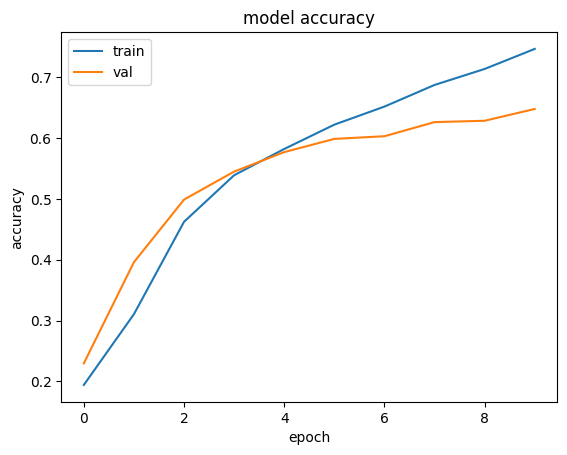

In [20]:
plt.plot(hitory.history['accuracy'])
plt.plot(hitory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
